In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys

### 데이터 전처리

In [15]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


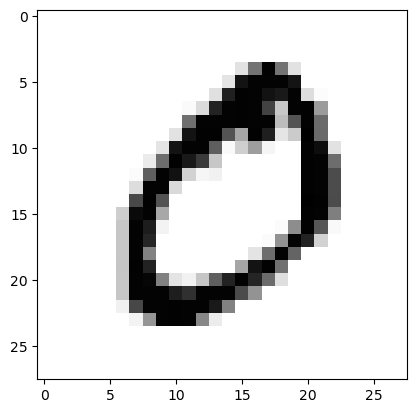

In [6]:
plt.imshow(X_train[1], cmap='Greys')
plt.show()

In [8]:
# 이미지가 저장된 배열 값확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [10]:
# 이미지가 저장된 배열 값확인
for x in X_train[0]:
    for i in x:
        print("%-3s" % i, end='')
    print()

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

3차원 이미지 데이터를 학습시키기기위해 2차원 데이터로

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) # == X_train.reshape(len(X_train), -1).shape
print(X_train.shape)

(60000, 784)


In [18]:
print(X_train.dtype)

uint8


정규화를 위해 int type data를 실수 type으로 바꾸고 255로 나눠 1이하의 값으로 나눠 준다.

In [19]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [21]:
# 테스트 데이터도 똑같이...
X_test = X_test.reshape(X_test.shape[0], -1).astype('float64') / 255

In [22]:
print("class : %d " % (y_train[0]))

class : 5 


0 ~ 9 까지 원핫 인코딩 해서 vector 형태로 한컬럼으로 만듦 (참조 pd.get_dummy)
loss='sparse_categorical_crossentropy 를 사용하는 경우 원핫 인코딩을 안써도 됨

In [26]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 만들기

In [29]:
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './data/model/all/cnn-{epoch:03d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0, save_best_only=True)

In [30]:
history = model.fit(X_train, y_train, epochs=30, batch_size=200, verbose=0, validation_split=0.25, callbacks=[early_stop, checkpointer])

In [31]:
print("Test accuracy : ", model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9803
Test accuracy :  [0.0722181424498558, 0.9803000092506409]


In [41]:
# print(X_train[0].shape)
# print(model.predict(y_test[0]))

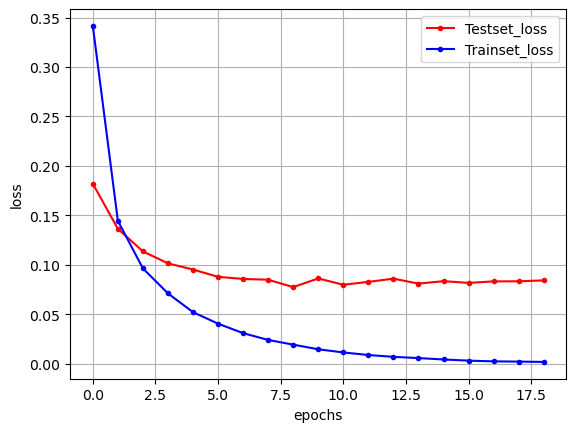

In [37]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_vloss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()